https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/code

In [23]:
import pandas as pd
import numpy as np

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

df = pd.read_csv('./data/diabetes.csv')

label = ['정상','당뇨']
#          0      1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA

In [2]:
import pandas as pd
import sweetviz as sv

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv('./data/diabetes.csv')
sv.config_parser.read_string("[General]\nuse_cjk_font=1")
my_report = sv.analyze(df)
# my_report.show_notebook(layout='widescreen',scale=0.8) #notebook, colab에서 표시하기
my_report.show_html(r'./image/sweet_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report ./image/sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


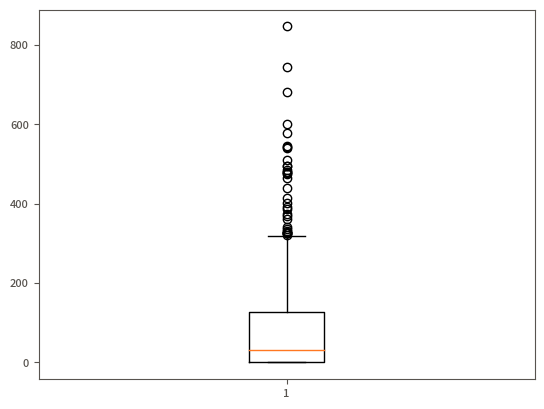

In [20]:
import matplotlib.pyplot as plt
plt.boxplot(df['Insulin'])
plt.show()


```
* 결측치 : x
* 중복값 : x
* 이상치 : 인슐린
* 형변환 : x
* 상관관계: 양
* 인코딩 : x
* 스케일링: 수치형이 많아서 좀 봐야함: 인슐린? / standard, robust
* 라벨불균형여부:불균형
```


### 로지스틱 회귀모델

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LogisticRegression

##########데이터 로드
df = pd.read_csv('./data/diabetes.csv')

label = ['정상','당뇨'] 

 
##########데이터 분석

x_data = df.drop(['Outcome'], axis = 1)
y_data = df['Outcome']
##########데이터 전처리

# 불균형데이터의 경우 stratify = y_target 지정할 것.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)


##########모델 생성

model = LogisticRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=label))

##########모델 예측

x_test = np.array([
    [1,85,66,29,0,26.6,0.351,31]
])

y_predict = model.predict(x_test)
label = label[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(f'분류결과:{label} {confidence}')


훈련_Accuracy: 0.7914338919925512
테스트_Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

          정상       0.77      0.86      0.81       150
          당뇨       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

분류결과:정상 0.9583209892212345


### 결정트리 회귀 모델

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LogisticRegression

##########데이터 로드
df = pd.read_csv('./data/diabetes.csv')

label = ['정상','당뇨'] 

 
##########데이터 분석

x_data = df.drop(['Outcome'], axis = 1)
y_data = df['Outcome']
##########데이터 전처리

# 불균형데이터의 경우 stratify = y_target 지정할 것.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)


##########모델 생성

model = DecisionTreeClassifier(random_state = 43, max_depth=5)

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=label))
##########모델 예측

x_test = np.array([
    [1,85,66,29,0,26.6,0.351,31]
])

y_predict = model.predict(x_test)
label = label[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(f'분류결과:{label} {confidence}')


훈련_Accuracy: 0.8435754189944135
테스트_Accuracy: 0.7705627705627706
              precision    recall  f1-score   support

          정상       0.76      0.95      0.84       150
          당뇨       0.82      0.44      0.58        81

    accuracy                           0.77       231
   macro avg       0.79      0.70      0.71       231
weighted avg       0.78      0.77      0.75       231

분류결과:정상 1.0


### KNN 최근접 이웃 모델

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report


# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.neighbors import KNeighborsClassifier

##########데이터 로드
df = pd.read_csv('./data/diabetes.csv')

label = ['정상','당뇨'] 

 
##########데이터 분석

x_data = df.drop(['Outcome'], axis = 1)
y_data = df['Outcome']
##########데이터 전처리

# 불균형데이터의 경우 stratify = y_target 지정할 것.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)


##########모델 생성

model = KNeighborsClassifier(n_neighbors=5)

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=label))

##########모델 예측

x_test = np.array([
    [1,85,66,29,0,26.6,0.351,31]
])

y_predict = model.predict(x_test)
label = label[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(f'분류결과:{label} {confidence}')


훈련_Accuracy: 0.8063314711359404
테스트_Accuracy: 0.7186147186147186
              precision    recall  f1-score   support

          정상       0.76      0.83      0.79       150
          당뇨       0.62      0.51      0.56        81

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231

분류결과:정상 0.8


### KNN 최근접 이웃 모델 스케일링

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

##########데이터 로드
df = pd.read_csv('./data/diabetes.csv')

label = ['정상','당뇨'] 

 
##########데이터 분석

X_data = df.drop(['Outcome'], axis = 1)
y_target = df['Outcome']
##########데이터 전처리

# 불균형데이터의 경우 stratify = y_target 지정할 것.
x_train, x_test, y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=42,stratify=y_target)

### 스케일링

transformer = MinMaxScaler()
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)


##########모델 생성

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='uniform')

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=label))

##########모델 예측

x_test = np.array([
    [1,85,66,29,0,26.6,0.351,31]
])

y_predict = model.predict(x_test)
label = label[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(f'분류결과:{label} {confidence}')


훈련_Accuracy: 0.8175046554934823
테스트_Accuracy: 0.70995670995671
              precision    recall  f1-score   support

          정상       0.76      0.81      0.78       150
          당뇨       0.60      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231

분류결과:당뇨 0.8
